In [126]:
import numpy as np 
import matplotlib
from matplotlib import pyplot as plt, lines, animation


file = open("C:\\Users\\Jerem\\Documents\\Spring 2023\\LING-715\\perceptron_training_data.tsv")


In [127]:
feats1 = []
feats2 = []
labels = []
for line in file.readlines():
    f1, f2, l = line.split()
    try:
        feats1.append(float(f1))
        feats2.append(float(f2))
        labels.append(int(l))
    except:
        pass


In [128]:
def step_function(output):
    if output > 0:
        return 1
    else:
        return 0

def get_decision_boundary(x1_list, weights_matrix, bias):
    minx = min(x1_list)
    maxx = max(x1_list)
    y0 = -bias-(minx*weights_matrix[0])/(weights_matrix[1])
    y1 = -bias-(maxx*weights_matrix[1])/(weights_matrix[1])
    return [y0, y1]


In [129]:
epochs = 25
bias = np.random.rand(1)
weights = np.random.rand(2)
learning_rate = 0.001

minx = min(feats1)
maxx = max(feats1)
miny = min(feats2)
maxy = max(feats2)

======================EPOCH 1======================
Accuracy: 5.0%
Weights [-0.00168769 -0.00223593]
Bias [0.85298588]
======================EPOCH 2======================
Accuracy: 100.0%
Weights [-0.00168769 -0.00223593]
Bias [0.85298588]
Converged after 2 epochs.


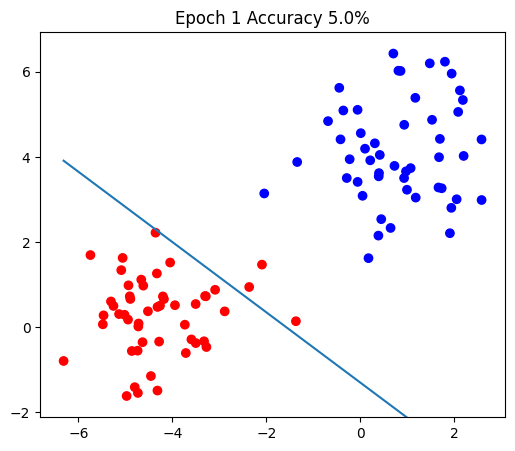

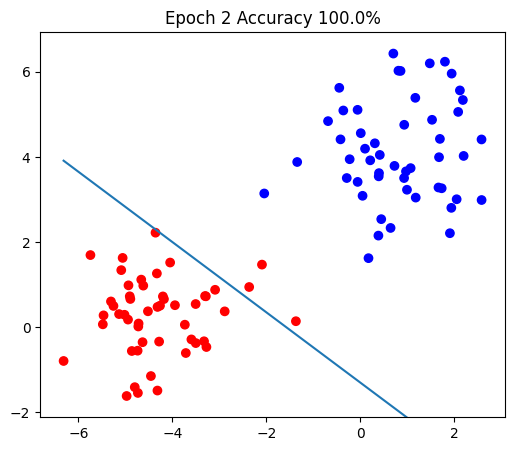

In [130]:
for i in range(epochs):
    correct = 0
    for x1, x2, label in zip(feats1, feats2, labels):
        x = np.array([x1, x2])
        y_hat = step_function(np.dot(x, weights))
        if y_hat != label and y_hat == 0:
            weights = weights + learning_rate*x
            bias = bias + learning_rate
        elif y_hat != label and y_hat == 1:
            weights = weights - learning_rate*x
            bias = bias - learning_rate
        elif y_hat == label:
            correct += 1
    
    accuracy = correct/len(labels)*100
    print('======================EPOCH {}======================'.format(i+1))
    print('Accuracy: {}%'.format(accuracy))
    print('Weights', weights)
    print('Bias', bias)
    
    #create the plot

    colors = ['blue', 'red']
    fig = plt.figure(figsize=(6, 5))
    ax = plt.axes()
    ax.set_xlim([minx-0.5, maxx+0.5])
    ax.set_ylim([miny-0.5, maxy+0.5])
    ax.set_title('Epoch {} Accuracy {}%'.format(i+1, accuracy))
    ax.scatter(feats1, feats2, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
    y_vals = get_decision_boundary(x1_list = feats1, weights_matrix = weights, bias = bias)
    
    if correct == len(labels):
        ax.plot([minx, maxx], y_vals)
        print('Converged after {} epochs.'.format(i+1))
        break
    else:
        ax.plot([minx, maxx], y_vals)

    
